<a href="https://colab.research.google.com/github/Arathics/Customer-Insurance-Purchases/blob/main/Project_I_Customer_Insurance_Purchases_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Run this cell to upload your CSV file
from google.colab import files
uploaded = files.upload()

# Then load the data
import pandas as pd
df = pd.read_csv("Social_Network_Ads.csv")
df.head()


Saving Social_Network_Ads.csv to Social_Network_Ads.csv


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [2]:
# Features and Target
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy'),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))



Logistic Regression Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100


KNN Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100


SVM Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       10

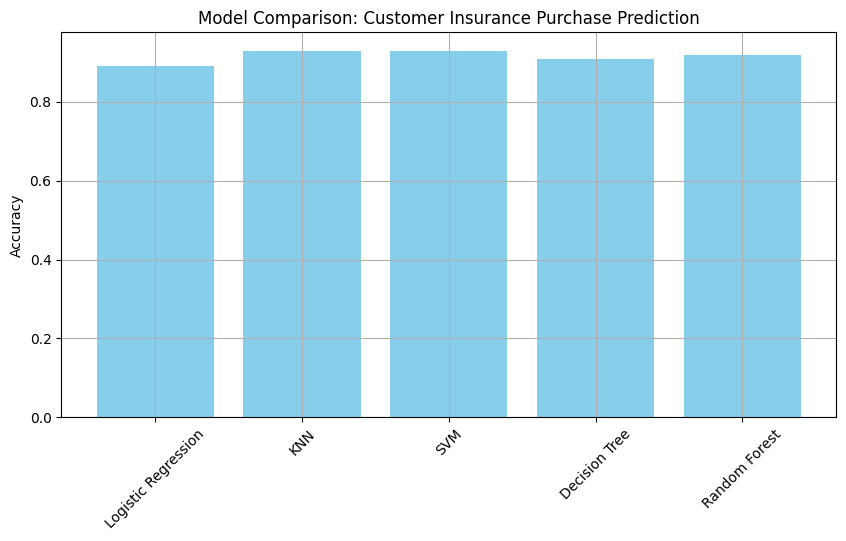

In [4]:
import matplotlib.pyplot as plt

# Plot model accuracies
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.title("Model Comparison: Customer Insurance Purchase Prediction")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [5]:
# Inputs to predict (replace 0 salary with average if needed)
custom_data = [
    [30, 87000],
    [40, df['EstimatedSalary'].mean()],  # No Salary replaced with mean
    [40, 100000],
    [50, df['EstimatedSalary'].mean()],  # No Salary replaced with mean
    [18, df['EstimatedSalary'].mean()],
    [22, 600000],
    [35, 2500000],
    [60, 100000000]
]

# Scale inputs
custom_data_scaled = sc.transform(custom_data)

# Use the best model (say Random Forest here) to predict
best_model = models["Random Forest"]
predictions = best_model.predict(custom_data_scaled)

# Show results
for i, (age, salary) in enumerate(custom_data):
    status = "Will Purchase" if predictions[i] == 1 else "Will Not Purchase"
    print(f"Age: {age}, Salary: {salary} → {status}")


Age: 30, Salary: 87000 → Will Not Purchase
Age: 40, Salary: 69742.5 → Will Purchase
Age: 40, Salary: 100000 → Will Purchase
Age: 50, Salary: 69742.5 → Will Purchase
Age: 18, Salary: 69742.5 → Will Not Purchase
Age: 22, Salary: 600000 → Will Purchase
Age: 35, Salary: 2500000 → Will Purchase
Age: 60, Salary: 100000000 → Will Purchase
